In [ ]:
Notebook made to test the viability of Neural Network model.

In [1]:
import pandas as pd
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,classification_report

Using TensorFlow backend.


In [2]:
df=pd.read_csv("../../Data/Imputed.csv")

In [3]:
df

,HINCP_x,SMOCP,NP,BDSP,INSP,RMSP,VALP,TAXAMT,ACR_<1.0>,ACR_<2.0>,...,YBL_<13.0>,YBL_<14.0>,YBL_<15.0>,YBL_<16.0>,YBL_<17.0>,YBL_<18.0>,YBL_<19.0>,YBL_<20.0>,YBL_<21.0>,YBL_<22.0>
0,47900.0,1042.0,4,3.0,890.0,6.0,165000.0,3650.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36100.0,691.0,2,3.0,600.0,6.0,35000.0,525.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100000.0,1042.0,1,0.0,890.0,1.0,165000.0,3650.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,45000.0,1042.0,2,2.0,890.0,5.0,165000.0,3650.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,88000.0,603.0,3,2.0,20.0,4.0,140.0,525.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246497,30000.0,1366.0,1,4.0,0.0,11.0,150000.0,6500.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246498,150000.0,2603.0,4,4.0,1200.0,8.0,275000.0,10500.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246499,85000.0,751.0,2,3.0,550.0,6.0,145000.0,5750.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246500,117500.0,1168.0,2,4.0,990.0,10.0,500000.0,11500.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#setting our dependent and independent variables
X=df.drop("HINCP_x",axis=1)
y=df["HINCP_x"]

In [5]:
y=np.reshape(y.values,(-1,1))

In [6]:
#splitting our data once to get out train and hold out set
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.8,random_state=2020)

In [7]:
#splitting once more to get the training and validation set
X_t,X_val,y_t,y_val=train_test_split(X_train,y_train,train_size=.8,random_state=2020)

In [8]:
#instantiating our scalrs
ss_x=StandardScaler()
mm_x=MinMaxScaler()

In [9]:
#fitting our standard scalar
X_t_ss=ss_x.fit_transform(X_t)
X_val_ss=ss_x.transform(X_val)

In [10]:
#fitting out minmax scalar the less complex of the two scalars
X_t_mm=mm_x.fit_transform(X_t)
X_val_mm=mm_x.transform(X_val)

In [11]:
# The R-squared predictor
from keras import backend as K
def coeff_determination(y_true, y_pred):
    """https://jmlb.github.io/ml/2017/03/20/CoeffDetermination_CustomMetric4Keras/"""

    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


In [28]:
#First model
model=Sequential()
model.add(Dense(50 ,activation="relu",input_dim=47))
model.add(Dense(25 ,activation="selu"))
model.add(Dense(1 ,activation='linear'))
model.compile(loss="mse",optimizer="adam",metrics=[tf.keras.metrics.RootMeanSquaredError(),"mae",coeff_determination])


In [38]:
model1=Sequential()
model1.add(Dense(50 ,activation="relu",input_dim=47))
model1.add(Dense(25 ,activation="selu"))
model1.add(Dense(1 ,activation='linear'))
model1.compile(loss="mse",optimizer="adam",metrics=[tf.keras.metrics.RootMeanSquaredError(),"mae",coeff_determination])


In [39]:
model2=Sequential()
model2.add(Dense(50 ,activation="relu",input_dim=47))
model2.add(Dense(25 ,activation="selu"))
model2.add(Dense(1 ,activation='linear'))
model2.compile(loss="mse",optimizer="adam",metrics=[tf.keras.metrics.RootMeanSquaredError(),"mae",coeff_determination])


In [31]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 50)                2400      
_________________________________________________________________
dense_35 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 26        
Total params: 3,701
Trainable params: 3,701
Non-trainable params: 0
_________________________________________________________________


In [32]:
#Creating early stop function to help minimize time of models
early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-08, patience=0, verbose=1,
                           mode='auto')
callbacks_list = [early_stop]

In [33]:
history=model.fit(X_t,y_t,epochs=50,batch_size=50,validation_split=.2,callbacks=callbacks_list)

Train on 126208 samples, validate on 31552 samples
Epoch 1/50
126208/126208 [==============================] - 3s 27us/step - loss: 6666979326.6592 - root_mean_squared_error: 84603.6797 - mae: 49565.5859 - coeff_determination: 0.1377 - val_loss: 6144323716.7181 - val_root_mean_squared_error: 81217.5000 - val_mae: 46848.5664 - val_coeff_determination: -0.0072
Epoch 2/50
126208/126208 [==============================] - 3s 25us/step - loss: 6240664763.0000 - root_mean_squared_error: 80571.2422 - mae: 48605.1406 - coeff_determination: 0.2035 - val_loss: 5946913876.0892 - val_root_mean_squared_error: 79913.3828 - val_mae: 48373.5859 - val_coeff_determination: -0.2892
Epoch 3/50
126208/126208 [==============================] - 3s 23us/step - loss: 6165681207.0811 - root_mean_squared_error: 79577.1094 - mae: 48225.3672 - coeff_determination: 0.2185 - val_loss: 5990946899.2779 - val_root_mean_squared_error: 79350.1484 - val_mae: 49163.4883 - val_coeff_determination: -0.3855
Epoch 00003: early 

In [40]:
history1=model1.fit(X_t_ss,y_t,epochs=50,batch_size=50,validation_split=.2,callbacks=callbacks_list)

Train on 126208 samples, validate on 31552 samples
Epoch 1/50
126208/126208 [==============================] - 3s 26us/step - loss: 11126300932.1907 - root_mean_squared_error: 119110.3750 - mae: 67297.8359 - coeff_determination: -0.4263 - val_loss: 6435887177.3063 - val_root_mean_squared_error: 102965.2656 - val_mae: 49218.0703 - val_coeff_determination: -0.2353
Epoch 2/50
126208/126208 [==============================] - 3s 25us/step - loss: 6144383509.1917 - root_mean_squared_error: 95450.3203 - mae: 46494.8203 - coeff_determination: 0.2207 - val_loss: 5633330798.8093 - val_root_mean_squared_error: 90773.5859 - val_mae: 43778.4766 - val_coeff_determination: 0.0261
Epoch 3/50
126208/126208 [==============================] - 3s 25us/step - loss: 5685841476.9391 - root_mean_squared_error: 87846.7266 - mae: 43836.1953 - coeff_determination: 0.2928 - val_loss: 5429880441.2698 - val_root_mean_squared_error: 85719.4609 - val_mae: 42901.0859 - val_coeff_determination: 0.0720
Epoch 4/50
126208

In [41]:
history2=model2.fit(X_t_mm,y_t,epochs=50,batch_size=50,validation_split=.2,callbacks=callbacks_list)

Train on 126208 samples, validate on 31552 samples
Epoch 1/50
126208/126208 [==============================] - 4s 29us/step - loss: 11228674366.0507 - root_mean_squared_error: 117594.2188 - mae: 64472.8906 - coeff_determination: -0.3800 - val_loss: 7471453299.2779 - val_root_mean_squared_error: 104004.1797 - val_mae: 53942.4414 - val_coeff_determination: -1.1241
Epoch 2/50
126208/126208 [==============================] - 4s 31us/step - loss: 7323138676.8032 - root_mean_squared_error: 98219.6562 - mae: 52285.4336 - coeff_determination: 0.1593 - val_loss: 6701411662.6207 - val_root_mean_squared_error: 94597.8203 - val_mae: 49440.6211 - val_coeff_determination: -0.4628
Epoch 3/50
126208/126208 [==============================] - 4s 33us/step - loss: 6668943325.7302 - root_mean_squared_error: 92268.3906 - mae: 48456.4062 - coeff_determination: 0.2375 - val_loss: 6193364144.4706 - val_root_mean_squared_error: 90257.5391 - val_mae: 46460.0625 - val_coeff_determination: -0.0276
Epoch 4/50
1262

dict_keys(['val_loss', 'val_root_mean_squared_error', 'val_mae', 'val_coeff_determination', 'loss', 'root_mean_squared_error', 'mae', 'coeff_determination'])


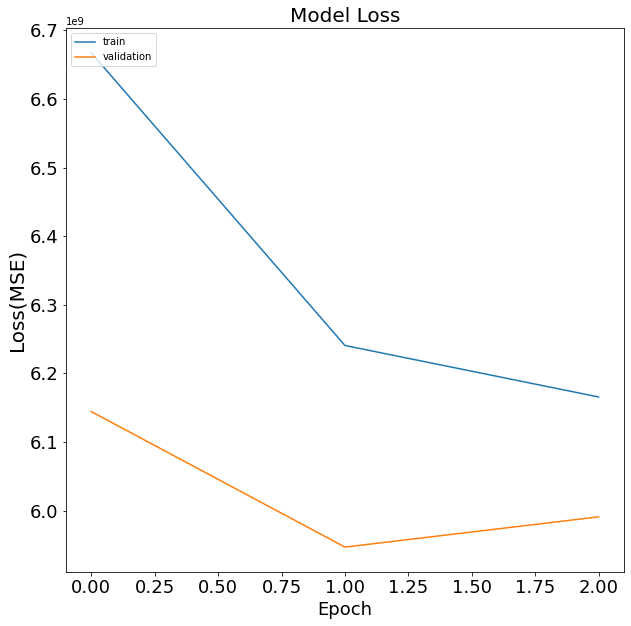

In [42]:
#plotting loss of base model
print(history.history.keys())
#'Loss'
fig, ax = plt.subplots(figsize=((10,10)))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss',fontsize=20)
plt.ylabel('Loss(MSE)',fontsize=20)
plt.xlabel('Epoch',fontsize=18)
plt.tick_params(axis="both",labelsize=18)
plt.legend(['train','validation'],loc='upper left')
# plt.savefig("model results",transparent=True,bbox_inches="tight",)
plt.show();

Look like the val data is performing better than train data so we may need to try a regularization tool to help close the gap.

dict_keys(['val_loss', 'val_root_mean_squared_error', 'val_mae', 'val_coeff_determination', 'loss', 'root_mean_squared_error', 'mae', 'coeff_determination'])


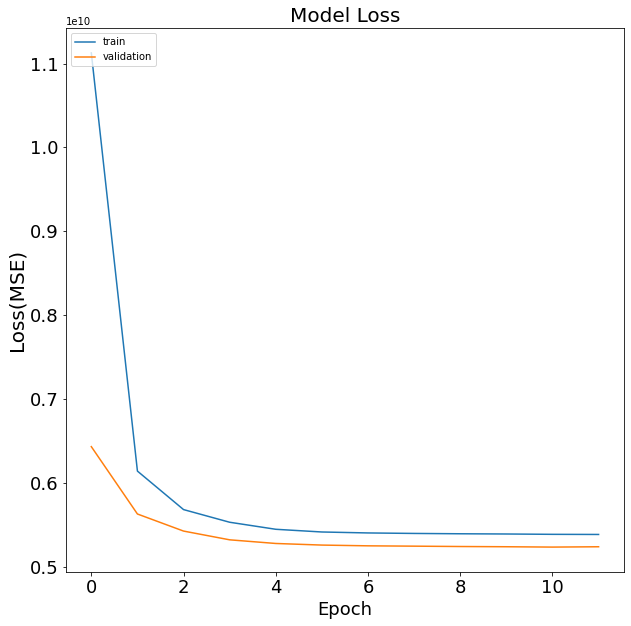

In [43]:
#plotting loss of Standard scalar
print(history1.history.keys())
#'Loss'
fig, ax = plt.subplots(figsize=((10,10)))
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss',fontsize=20)
plt.ylabel('Loss(MSE)',fontsize=20)
plt.xlabel('Epoch',fontsize=18)
plt.tick_params(axis="both",labelsize=18)
plt.legend(['train','validation'],loc='upper left')
# plt.savefig("model results",transparent=True,bbox_inches="tight",)
plt.show();

Now looking at the standard scalar model there is less of a gap between the train and validation set, but still  a very large mse

dict_keys(['val_loss', 'val_root_mean_squared_error', 'val_mae', 'val_coeff_determination', 'loss', 'root_mean_squared_error', 'mae', 'coeff_determination'])


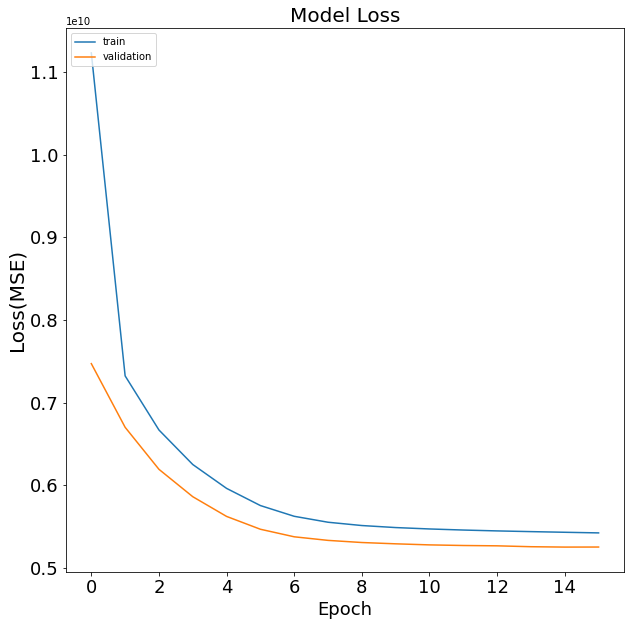

In [44]:
#plotting loss of Minmax Scalar
print(history2.history.keys())
#'Loss'
fig, ax = plt.subplots(figsize=((10,10)))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss',fontsize=20)
plt.ylabel('Loss(MSE)',fontsize=20)
plt.xlabel('Epoch',fontsize=18)
plt.tick_params(axis="both",labelsize=18)
plt.legend(['train','validation'],loc='upper left')
# plt.savefig("model results",transparent=True,bbox_inches="tight",)
plt.show();

The Minmax scalar is have a similar reaction as the standard scalar where the min max between the validation and test set are close, but once again the mse is still an enormous number.